### Numerical Physics - Assignment 1

In [1]:
#Importing files
%run implement.ipynb
%run collisionWall.ipynb
%run collisionParticle.ipynb
%run priorityQueue.ipynb
%run supportingFunctions.ipynb
%run histogram.ipynb

#Importing relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [1]:
def main(N, v0, timestop, mass, xi, task3=0,task4=0):
    '''
    Parameters:
        N = Number of particles
        v0 = Initial velocity

    1) implement particles array
    2) Find collision times, particle-particle collisions and wall
    3) Make priority queue 
    4) timestep
    5) fix after collision
    6) Update queue
    7) next collision
    '''

    #time 
    t = 0
    timearray = np.zeros(1)

    #particles 
    particles, collision_count = implement(N, v0, mass, task4)  
    particles_move = np.array([np.copy(particles)])             #to animate each step


    collision_times_wall = find_min_collision_time_wall(particles, collision_count) 
    collision_times_particles = particleCollisionInitialize(particles, collision_count)

    priQueue, timestep, particle1, particle2, wall, collision_count = priorityQueue(collision_count, collision_times_wall, collision_times_particles) # find the next collision 
    pp_collision = 0
    collision_avg_array = np.array([]) #task4
    print(f' first collision {particle1}, {particle2} and {timestep}')
    if task4 != 0:
        initial_energy,_,_,_,_ = average(timearray,particles_move[0], N, mass,0,0,1)
    
    while pp_collision < N*10:
        t += timestep   
       
        
        if timestep < 0:
            print('noe er feil med timestep:)')

        timearray = np.concatenate((timearray,np.array([t])),axis=0)  

        if wall == 2:
            particles, new_collisiontime_particle, particle1, particle2 = calculate_next_collision_times(particles, particle1, particle2, collision_count, timestep, xi)
            new_collisiontime_wall = find_min_collision_time_wall(particles, collision_count)
            pp_collision += 1
        
        elif wall == 0 or wall == 1:
            particles, new_collisiontime_wall, particle1 = after_collision_wall(particles, particle1, wall, timestep, v0, collision_count, xi) 
            new_collisiontime_particle = new_time_after_collision_wall(particles, particle1, collision_count)
        
        
        particles_move = np.concatenate((particles_move,np.array([particles])),axis=0)
        timestep, particle1, particle2, wall, priQueue, collision_count = updatePqueue(priQueue, new_collisiontime_wall, new_collisiontime_particle,collision_count)
        
        if timestep == np.inf:
            break

        collision_stop = np.sum(collision_count)/len(collision_count) #avg collision per particle
        collision_avg_array = np.concatenate((collision_avg_array,np.array([collision_stop])),axis=0)


        if task3 != 0:
            if collision_stop > 25:
                break 
        
        if task4 != 0:
            total_energy,_,_,_,_ = average(timearray,particles_move[-1], N, mass,0,0,1)

            if total_energy < (0.1 * initial_energy):
                break
        

    return particles,particles_move,timearray,collision_count

mass = np.array([1]) 
particles,particles_move,timearray,col = main(500, 1, 1,mass,1,0,0) 


NameError: name 'np' is not defined

In [ ]:
#ANIMERE PARTIKLENE
%matplotlib notebook
from matplotlib.animation import FuncAnimation

#Her må vi hente ut alle x og y verdier
x_values = np.zeros((len(particles_move), len(particles_move[0])))
y_values = np.zeros((len(particles_move), len(particles_move[0])))

for i in range(len(particles_move)):
    for j in range(len(particles_move[0])):
        x_values[i,j] = particles_move[i,j,0]
        y_values[i,j] = particles_move[i,j,1]
        
# create the figure and axes objects
fig, ax = plt.subplots()

# function that draws each frame of the animation
def animate(i):
    ax.clear()
    ax.plot(x_values[i], y_values[i], 'or')
    ax.set_xlim([0,1]) 
    ax.set_ylim([0,1])

# run the animation
ani = FuncAnimation(fig, animate, frames=20, interval=500, repeat=False)

plt.show('notebook')

#### Task 1

- Make a histogram showing the initial speed distribution (which should be a delta
function, since all particles have the same speed).

- Let the system run until it has
 reached equilibrium (number of particle-particle collisions should be much larger
than the number of particles), and make a new histogram of the speed distribution.


In [3]:
velocity_init = velocity_histogram(particles_move[0])
velocity_final = velocity_histogram(particles)

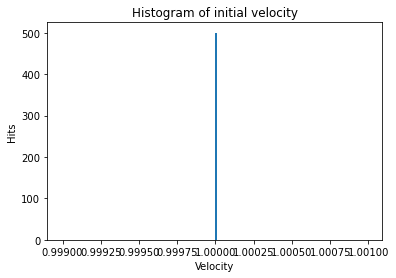

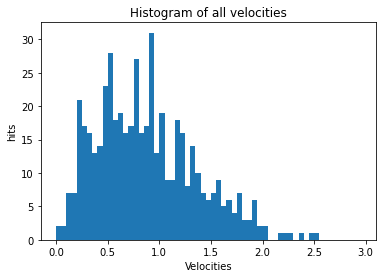

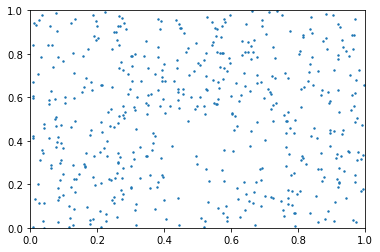

In [4]:
%matplotlib inline
b = np.arange(0.999,1.001,0.00001)
plt.figure(1)
plt.title("Histogram of initial velocity")
plt.xlabel("Velocity")
plt.ylabel("Hits")
plt.hist(velocity_init,bins=b)
plt.savefig('/Users/simon/Downloads/1histoinitial.png')
plt.show()

bins_all = np.arange(0,3,0.05)
plt.figure(2)
plt.title("Histogram of all velocities")
plt.xlabel("Velocities")
plt.ylabel("hits")
plt.hist(velocity_final, bins=bins_all)
plt.savefig('/Users/simon/Downloads/1histoall.png')
plt.show()


#plt.scatter(particles_move[-1][0][0],particles_move[-1][0][1],s=5)

plt.scatter(particles_move[-1][1:][:,0],particles_move[-1][1:][:,1],s=2)
#plt.scatter(particles_mq1ove[0][:,0] ,particles_move[0][:,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('/Users/simon/Downloads/pib.png')

plt.show()

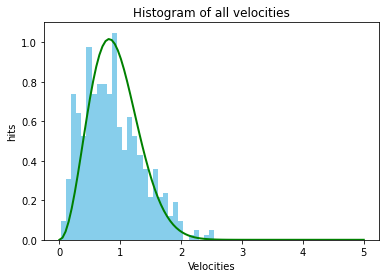

In [5]:
import scipy.stats as stats

maxwell = stats.maxwell
params = maxwell.fit(velocity_final, floc=0)

plt.hist(velocity_final, color = 'skyblue', bins=30, density=True)
x = np.linspace(0, 5, 100)
plt.savefig('/Users/simon/Downloads/maxwell.png')
plt.plot(x, maxwell.pdf(x, *params), 'g', lw=2)
plt.savefig('/Users/simon/Downloads/maxwellnoe1.png')
plt.title("Histogram of all velocities")
plt.xlabel("Velocities")
plt.ylabel("hits")

plt.show()

### Task 2

Here, we will simulate a mixture of two gases with different mass per particle. 

- Give half the particles mass m = m0, and the other
 half m = 4m0. Plot the histogram showing the speed distribution separately for
 the two particle masses, both initially and after the system has reached equilibrium.


- Calculate also the average speed and the average kinetic energy separately for the
two particle masses. In this problem, use ξ = 1.

 first collision 244, 244 and 0.0
The average velocity for mass 1 m is 1.4240596564601096.
And the average velocity for mass 4 m is 0.6941170170438663.
The average kinetic energy for mass 1 m is 1.2983072846509867 J.
And the average kinetic energy for mass 4 m is 1.201692715349066 J.


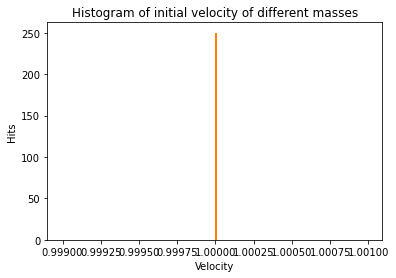

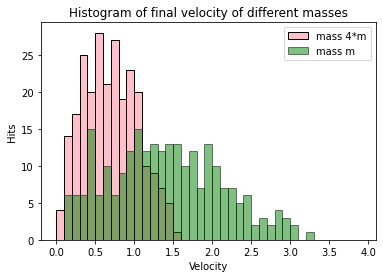

In [7]:
#initialize
mass2 = np.array([1,4])
N = 500


particles,particles_move,timearray,_ = main(N, 1, 1,mass2,1)
NN = int(N/2)

#ENERGY
tot_kin_after, avg_kin1_after, avg_kin4_after, avg_vel1_after, avg_vel4_after = average(timearray,particles_move[-1], N, mass2,1,0,0)

#print(f'The average velocity for mass 1 m is {avg_vel1}.\nAnd the average velocity for mass 4 m is {avg_vel4}.')
#print(f'The average kinetic energy for mass 1 m is {avg_kin1} J.\nAnd the average kinetic energy for mass 4 m is {avg_kin4} J.')

print(f'The average velocity for mass 1 m is {avg_vel1_after}.\nAnd the average velocity for mass 4 m is {avg_vel4_after}.')
print(f'The average kinetic energy for mass 1 m is {avg_kin1_after} J.\nAnd the average kinetic energy for mass 4 m is {avg_kin4_after} J.')

#HISTOGRAM 
velocity_initial_mass1 = velocity_histogram(particles_move[0][0:NN]) #MASS 1
velocity_initial_mass4 = velocity_histogram(particles_move[0][NN:])  #MASS 4
velocity_final_mass1 = velocity_histogram(particles[0:NN])
velocity_final_mass4 = velocity_histogram(particles[NN:])

#Plotting
b = np.arange(0.999,1.001,0.00001)
plt.figure(1)
plt.title("Histogram of initial velocity of different masses")
plt.xlabel("Velocity")
plt.ylabel("Hits")
plt.hist(velocity_initial_mass1,bins=b)
plt.hist(velocity_initial_mass4,bins=b)
plt.savefig('/Users/simon/Downloads/2histomassesinitial.png')
plt.show()

bins_all = np.arange(0,4,0.1)
plt.figure(2)

plt.title("Histogram of final velocity of different masses")
plt.xlabel("Velocity")
plt.ylabel("Hits")
plt.hist(velocity_final_mass4,bins=bins_all, color = 'pink', ec = 'black', label='mass 4*m')         
plt.hist(velocity_final_mass1,bins=bins_all, color = 'green', ec = 'black', label='mass m', alpha = 0.5)
plt.legend()
plt.savefig('/Users/simon/Downloads/2histomassesfinal.png')
plt.show()

In [ ]:
print(f'The average velocity for mass 1 m is {avg_vel1_after}.\nAnd the average velocity for mass 4 m is {avg_vel4_after}.')
print(f'The average kinetic energy for mass 1 m is {avg_kin1_after} J.\nAnd the average kinetic energy for mass 4 m is {avg_kin4_after} J.')

The average velocity for mass 1 m is 1.4484285506743109.
And the average velocity for mass 4 m is 0.6782293442473908.
The average kinetic energy for mass 1 m is 1.3304730078312608 J.
And the average kinetic energy for mass 4 m is 1.1695269921688258 J.


### Task 3

For this problem, you will write output at short
 intervals (average number of collisions per particle ≪ 1 during an interval). 

- At each output step, calculate the average kinetic energy over all particles, the average over
those particles with mass m = m0, and the average over those with mass m = 4m0.


- Run the simulation until the average number of particle-particle collisions per particle
reaches 10 or 20 or so, then make a plot showing the development of the three averages
as a function of time. Repeat this procedure for ξ = 1, ξ = 0.9 and ξ = 0.8. 

- The point of this task and the 
previous problem is to demonstrate that with ξ = 1, the system reaches equilibrium,
and the average kinetic energy (and hence the temperature) of the two gases is the
same. When ξ < 1, however, the system does not reach equlibrium, and the two
gases do not have the same temperature.

In [8]:

# find avg energy for differnt xi
xi_list = [1, 0.9, 0.8]
avg_kin_all_xi1 = np.array([])
avg_kin_mass1_xi1 = np.array([]) #like this because we dont know the final length ? 
avg_kin_mass4_xi1 = np.array([]) # final length == number of timesteps; unknown

avg_kin_all_xi09 = np.array([])
avg_kin_mass1_xi09 = np.array([]) #like this because we dont know the final length ? 
avg_kin_mass4_xi09 = np.array([])

avg_kin_all_xi08 = np.array([])
avg_kin_mass1_xi08 = np.array([]) 
avg_kin_mass4_xi08 = np.array([])

for i in xi_list: #just put time really high so that we ensure that collision_stop is what stops the loop
    print(i)
    particles,particles_move,timearray,_ = main(1000, 5, 1000, mass2,i,1)
    
    for j in range(len(timearray)):
        tot_kin, avg_kin1, avg_kin4,_,_ = average(timearray,particles_move[j], N, mass2,0,1,0)# we now have 2D arrays with energies from each timestep

        if i == xi_list[0]:
            
            avg_kin_all_xi1 = np.concatenate((avg_kin_all_xi1,np.array([tot_kin])),axis=0)
            avg_kin_mass1_xi1 = np.concatenate((avg_kin_mass1_xi1,np.array([avg_kin1])),axis=0)
            avg_kin_mass4_xi1 = np.concatenate((avg_kin_mass4_xi1,np.array([avg_kin4])),axis=0)
        
        if i == xi_list[1]:
            
            avg_kin_all_xi09 = np.concatenate((avg_kin_all_xi09,np.array([tot_kin])),axis=0)
            avg_kin_mass1_xi09 = np.concatenate((avg_kin_mass1_xi09,np.array([avg_kin1])),axis=0)
            avg_kin_mass4_xi09 = np.concatenate((avg_kin_mass4_xi09,np.array([avg_kin4])),axis=0)
            
        if i == xi_list[2]:
    
            avg_kin_all_xi08 = np.concatenate((avg_kin_all_xi08,np.array([tot_kin])),axis=0)
            avg_kin_mass1_xi08 = np.concatenate((avg_kin_mass1_xi08,np.array([avg_kin1])),axis=0)
            avg_kin_mass4_xi08 = np.concatenate((avg_kin_mass4_xi08,np.array([avg_kin4])),axis=0)

#total energy
x_1 = np.linspace(0,avg_kin_all_xi1[-1],len(avg_kin_all_xi1))
x_09 = np.linspace(0,avg_kin_all_xi09[-1],len(avg_kin_all_xi09))
x_08 = np.linspace(0,avg_kin_all_xi08[-1],len(avg_kin_all_xi08))
    

1
 first collision 58, 295 and 0.00012147475838165977


KeyboardInterrupt: 

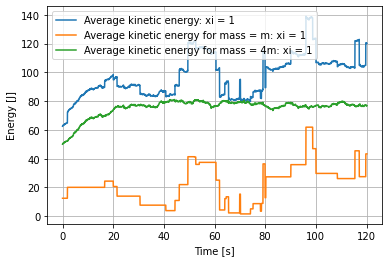

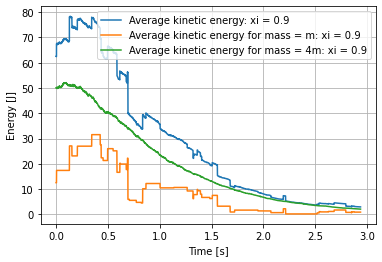

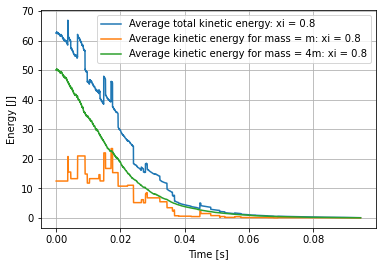

In [ ]:
# PLOTTING
plt.plot(x_1,avg_kin_all_xi1, label='Average kinetic energy: xi = 1')
plt.plot(x_1,avg_kin_mass1_xi1, label='Average kinetic energy for mass = m: xi = 1')
plt.plot(x_1,avg_kin_mass4_xi1, label='Average kinetic energy for mass = 4m: xi = 1')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Energy [J]')
plt.grid()
plt.savefig('/Users/simon/Downloads/3energyxi1.png')
plt.show()

plt.plot(x_09,avg_kin_all_xi09, label='Average kinetic energy: xi = 0.9')
plt.plot(x_09,avg_kin_mass1_xi09, label='Average kinetic energy for mass = m: xi = 0.9')
plt.plot(x_09,avg_kin_mass4_xi09, label='Average kinetic energy for mass = 4m: xi = 0.9')
plt.xlabel('Time [s]')
plt.ylabel('Energy [J]')
plt.legend()
plt.grid()
plt.savefig('/Users/simon/Downloads/3energyxi09.png')
plt.show()

plt.plot(x_08,avg_kin_all_xi08, label='Average total kinetic energy: xi = 0.8')
plt.plot(x_08,avg_kin_mass1_xi08, label='Average kinetic energy for mass = m: xi = 0.8')
plt.plot(x_08,avg_kin_mass4_xi08, label='Average kinetic energy for mass = 4m: xi = 0.8')
plt.xlabel('Time [s]')
plt.ylabel('Energy [J]')
plt.legend()
plt.grid()
plt.savefig('/Users/simon/Downloads/3energyxi08.png')
plt.show()

### Task 4

- Set up a system with somewhere between 1000 and 10000 particles.

- One
 particle will be the projectile, and will have larger mass and radius than the others.
Give it an initial position of x0 = [0.5, 0.75], and a downwards velocity v0 = [0, −v0]. v0 = 5

- The remaining particles will form a “wall”. Give them zero initial velocity, and
 uniformly distributed random positions within the area bounded by 0 < x < 1, 0 < y < 0.5 

- As starting values, you may set the mass of the projectile to 25 times the mass of
 the smaller particles, and the radius of the projectile to 5 times the radius of the smaller particles.

- Set ξ = 0.5, and give the projectile a speed of v0 = 5. Run the
 simulation until only 10% of the initial energy remains.


In [ ]:
import matplotlib.pyplot as plt
N = 800
particles,particles_move,timearray,col = main(N, 1, 100000,mass2,0.5,0,1)


In [ ]:


#plt.scatter(particles_move[0][304][0],particles_move[0][304][1],s=2)
plt.scatter(particles_move[0][0][0],particles_move[0][0][1],s=5)
plt.scatter(particles_move[0][1:][:,0],particles_move[0][1:][:,1],s=2)
#plt.scatter(particles_move[0][:,0] ,particles_move[0][:,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

#plt.scatter(particles_move[1][304][0],particles_move[1][304][1],s=2)
plt.scatter(particles_move[1][0][0],particles_move[1][0][1],s=5)
plt.scatter(particles_move[1][1:][:,0],particles_move[1][1:][:,1],s=2)
#plt.scatter(particles_mq1ove[0][:,0] ,particles_move[0][:,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

#plt.scatter(particles_move[7][304][0],particles_move[7][304][1],s=2)
plt.scatter(particles_move[7][0][0],particles_move[7][0][1],s=5)
plt.scatter(particles_move[7][1:][:,0],particles_move[7][1:][:,1],s=2)
#plt.scatter(particles_mq1ove[0][:,0] ,particles_move[0][:,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()



In [ ]:
import matplotlib.pyplot as plt



In [ ]:
plt.scatter(particles_move[0][4][0],particles_move[0][4][1],s=2)
plt.scatter(particles_move[0][0][0],particles_move[0][0][1],s=10)
plt.scatter(particles_move[0][1:][:,0],particles_move[0][1:][:,1],s=2)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

plt.scatter(particles_move[1][4][0],particles_move[1][4][1],s=2)
plt.scatter(particles_move[1][0][0],particles_move[1][0][1],s=10)
plt.scatter(particles_move[1][1:][:,0],particles_move[1][1:][:,1],s=2)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

plt.scatter(particles_move[-1][4][0],particles_move[-1][4][1],s=2)
plt.scatter(particles_move[-1][0][0],particles_move[-1][0][1],s=10)
plt.scatter(particles_move[-1][1:][:,0],particles_move[-1][1:][:,1],s=2)
plt.savefig('/Users/simon/Downloads/scattering.png')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [ ]:
'''
So, need to find crater size. Get the number of the particles that have moved. 
So, check particle_move[0] and particle_move[-1]. Look at every particle but 0.
Then we have 10 different radius for the projectile, and plot the crater size. 
'''
N = 2500
radius_projectile = [5.0,8,10,13,15,18,20,23,25,28,30,33,35,38,40,43,45,48,50,53,55,58,60]
crater_size = np.array([])
move_size = np.array([])
for i in radius_projectile:
    particles,particles_move,timearray,col = main(N, 1, 100000,mass2,0.5,0,i)  # get the first one
    checkx = particles_move[-1][1:][:,0] - particles_move[0][1:][:,0]
    checky = particles_move[-1][1:][:,1] - particles_move[0][1:][:,1]
    crater = checkx - checky
    index = np.where(crater == 0)
    for j in index:
        crater = np.delete(crater,j,axis=0)
    print(f' the size {len(crater)} and the radius {i} and particlesmove {len(particles_move)}')
    crater_size = np.concatenate((crater_size,np.array([len(crater)])),axis=0)
    move_size = np.concatenate((move_size,np.array([len(particles_move)])),axis=0)





In [ ]:
plt.plot(radius_projectile, crater_size, label='Crater size as a function of the radius of the projectile')
poly = np.polyfit(radius_projectile, crater_size, deg=7)
plt.plot(radius_projectile,np.polyval(poly, radius_projectile), label='fit')
plt.legend()
plt.grid()
plt.savefig('/Users/simon/Downloads/crater2500.png')
plt.show()

print(crater_size)

relative_crater = crater_size/move_size
plt.plot(radius_projectile, relative_crater, label='Crater size relative to the number of timesteps')
plt.legend()
plt.grid()
plt.show()
plt.savefig('/Users/simon/Downloads/crater22.png')
print(relative_crater)

In [ ]:
plt.scatter(particles_move[0][20][0],particles_move[0][20][1],s=2)
plt.scatter(particles_move[0][0][0],particles_move[0][0][1],s=5)
plt.scatter(particles_move[0][1:][:,0],particles_move[0][1:][:,1],s=2)
#plt.scatter(particles_move[0][:,0] ,particles_move[0][:,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('/Users/simon/Downloads/lastnoe.png')
plt.show()


plt.scatter(particles_move[-1][20][0],particles_move[-1][20][1],s=2)
plt.scatter(particles_move[-1][0][0],particles_move[-1][0][1],s=4)
plt.scatter(particles_move[-1][1:][:,0],particles_move[-1][1:][:,1],s=2)
#plt.scatter(particles_move[0][:,0] ,particles_move[0][:,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('/Users/simon/Downloads/lastnoe11.png')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d17ccd91-5f3d-4d77-a625-6b1eb51e3637' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>